## Sprint 2: Baseline Modeling

By: Keina Aoki

Dec. 15, 2023

# Exploratory Data Analysis (EDA)

Prepared by Keina Aoki

November 2023

## Introduction

In today's digital age, social media and online news sources offers quick access to vast amounts of data. Yet the creation and dissemination of fake news poses an emerging challenge as it has the potential to generate mistrust in persons and institutions. There are broadly two types of fake information: misinformation and disinformation. 1) Misinformation refers to information which is incorrect or misleading or taken out of context unsuspectingly shared by people. 2) Disinformation refers to false information spread deliberately with the intent to deceive public opinion. While both mis/disinformation exist because people want to share a certain narrative that aligns with their interests and beliefs, disinformation is more dangerous and damaging because its intention is to destabilize societies. It is meant to influence people's beliefs, attitudes and consequentially, their behavior by purposely only providing one side of a narrative. Nonetheless, disinformation poses a threat to democracy because it reinforces polarizing viewpoints.

The authenticity of news content has become difficult to discern not only because of social media algorithms that determine the content a user sees and interacts with, but because human minds are faulty to judgement about information. Thus, it is imperative to develop tools that can detect fake news to ensure that we are well informed.

This project aims to train a model to identify fake news through twitter posts (now known as X). It will employ machine learning techniques such as natural language processing and eventually use sentiment analysis to assess the credibility of a news story based on the emotion that the words in the statement elicits. The data set is sourced from https://www.unb.ca/cic/datasets/truthseeker-2023.html which includes fake and real news.

In previous notebook (EDA.ipynb), we explored and performed Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. In this Jupyter Notebook, we will expand our previous work and delve into feature engineering and into the modeling phase. Our project has two distinct steps:

First, we will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) package to extract sentiment features from the tweets. These sentiment features include a positive sentiment score, a neutral sentiment score, and a negative sentiment score. A combination of these features, called compound is then calculated in order to get the general sentiment of the tweets.

Second, we will use the CountVectorizer to first tokenize the tweets, then vectorize the tokenized data in order to get a document-term matrix. 

After merging the document-term matrix, sentiment scores and the original dataset, we are planning to employ Classification models such as Logisitc Regression, Decision Tree Classifer, Naive Bayes, K-nearest neighbors and Support Vector Machine for predicting the target variable (fake = 0, real = 1). The forthcoming stages of our project will involve refining these models and leveraging their predictive capabilities.

## Data Dictionary

Our dataset (Features_For_Traditional_ML.csv) includes the following fields:


| Name | Description   |
|:------|:------|
|  unique_count |number of unique, complex words|
|total_count |total number of words|
|ORG_percent | Percent of text including spaCy ORG tags (organizations, companies, agencies, institutions)
|NORP_percent |Percent of text including spaCy NORP tags (nationalities or religious or political groups)
|GPE_percent | Percent of text including spaCy GPE tags (countries, cities, states)
|PERSON_percent | Percent of text including spaCy PERSON tags (people, including fictional)
|MONEY_percent | Percent of text including spaCy MONEY tags (monetary values, including unit)
|DATE_percent | Percent of text including spaCy DATE tags (absolute or relative dates or periods)
|CARDINAL_percent | Percent of text including spaCy CARDINAL tags (numerals that do not fall under another type)
|PERCENT_percent | Percent of text including spaCy PERCENT tags (percentage, including "%")
|ORDINAL_percent | Percent of text including spaCy ORDINAL tags ("first", "second", etc.)
|FAC_percent | Percent of text including spaCy FAC tags (buildings, airports, highways, bridges, etc.)
|LAW_percent | Percent of text including spaCy LAW tags (named documents made into laws)
|PRODUCT_percent | Percent of text including spaCy PRODUCT tags (objects, vehicles, foods, etc. (not services))
|EVENT_percent | Percent of text including spaCy EVENT tags (named hurricanes, battles, wars, sports events, etc.)
|TIME_percent | Percent of text including spaCy TIME tags (times smaller than a day)
|LOC_percent | Percent of text including spaCy LOC tags (non-GPE locations, mountain ranges, bodies of water)
|WORK_OF_ART_percent | Percent of text including spaCy WOA tags (titles of books, songs, etc.)
|QUANTITY_percent | Percent of text including spaCy QUANTITY tags (measurements, as of weight or distance) 
|LANGUAGE_percent | Percent of text including spaCy LANGUAGE tags (any named language)
|Max Word | Length of the longest word in the sentence
|Min Word | Length of the shortest word in the sentence
|Avg Word Length | Average length of words in the sentence
|present_verb | Number of present tense verbs
|past_verb | Number of past tense verbs
|adjectives | Number of adjectives
|adverbs | Number of adverbs
|adpositions | Number of adpositions
|pronouns | Number of pronouns
|TO’s | Number of to usages
|determiners | Number of determiners
|conjunctions | Number of conjunctions
|dots | Number of (.) used
|exclamations | Number of (!) used
|question | Number of (?) used
|ampersand | Number of (&) used
|capitals | Number of capitalized letters
|digits | Number of digits (0-9) used
|word_count | Number of words
|long_word_freq | Number of long words
|short_word_freq | Number of short words
|followers_count | Number of followers
|friends_count | Number of friends
|favourites_count | Number of favourites across all tweets
|statuses_count | Number of tweets
|listed_count | Number of tweets the user has in lists
|mentions | Number of times the user was mentioned
|replies | Number of replies the user has
|retweets | Number of retweets the user has
|favourites | Number of favourites the user has
|hashtags | Number of hashtags (#) the user has used
|URLs | whether the user has a provided a url in relation to their profile
|quotes | Number of times the user has been quote tweeted
|BotScoreBinary | Binary score whether the user is considered a bot or not
|cred | Credibility score
|normalized_influence | Influence score the user has, normalized
|majority_target | Truth value of the tweet
|statement | Headline of a new article
|BinaryNumTarget | Binary representation of the statement's truth value (1 = True / 0 = False)
|tweet | Twitter posts related to the associated manual keywords

Note: spaCy tags refers to the spaCy natural language processing model that classifies text into categories

### Data Loading

In [72]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# load the data and store to df variable
df = pd.read_csv("Features_For_Traditional_ML_Techniques.csv", index_col=0)

# preview the first 5 rows
df.head()

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",4262.0,3619.0,34945.0,16423.0,44.0,0.0,...,0,0,5,0,1,0,33,3,5,19
1,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.",1393.0,1621.0,31436.0,37184.0,64.0,0.0,...,0,2,1,0,0,0,14,0,2,34
2,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,9.0,84.0,219.0,1184.0,0.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",4262.0,3619.0,34945.0,16423.0,44.0,0.0,...,0,1,3,0,0,1,6,8,1,30
4,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",70.0,166.0,15282.0,2194.0,0.0,0.0,...,0,1,3,0,1,0,11,3,2,19


### Data Cleaning

In [74]:
df.shape

(134198, 63)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134198 entries, 0 to 134197
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   majority_target         134198 non-null  bool   
 1   statement               134198 non-null  object 
 2   BinaryNumTarget         134198 non-null  float64
 3   tweet                   134198 non-null  object 
 4   followers_count         134198 non-null  float64
 5   friends_count           134198 non-null  float64
 6   favourites_count        134198 non-null  float64
 7   statuses_count          134198 non-null  float64
 8   listed_count            134198 non-null  float64
 9   following               134198 non-null  float64
 10  embeddings              134198 non-null  object 
 11  BotScore                134198 non-null  float64
 12  BotScoreBinary          134198 non-null  float64
 13  cred                    134198 non-null  float64
 14  normalize_influence     1

In [76]:
df.describe()

,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,cred,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.0,134198.000000,134198.000000,134198.000000,...,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.0,0.059106,0.032355,0.405852,...,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.0,0.167819,0.176942,0.239223,...,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.0,0.030000,0.000000,0.223684,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,14.000000
50%,1.000000,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.0,0.030000,0.000000,0.386691,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,21.000000
75%,1.000000,1.573000e+03,1726.000000,3.352650e+04,3.357375e+04,11.000000,0.0,0.030000,0.000000,0.525020,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,15.000000,4.000000,3.000000,28.000000
max,1.000000,1.306019e+08,586901.000000,1.765080e+06,2.958918e+06,222193.000000,0.0,1.000000,1.000000,1.000000,...,5.000000,13.000000,50.000000,66.000000,43.000000,13.000000,250.000000,138.000000,47.000000,164.000000


Findings:
- All columns are numeric columns, except `majority_target`, `statement`, `tweet`, and `embeddings`.
- There is a total of rows 134198 and 63.
- The target variable is `BinaryNumTarget` with a data type float64.
- `following` has no values
- There are no null values. 

In [77]:
# drop columns
df = df.drop(columns = ["following"])

In [78]:
# drop BotScore and BinaryBotScore as we do not need these in our analysis
df = df.drop(columns = ["BotScore", "BotScoreBinary"])

In [79]:
df.duplicated().sum()

0

There are no duplicated rows in this dataset.

### Exploratory Data Analysis

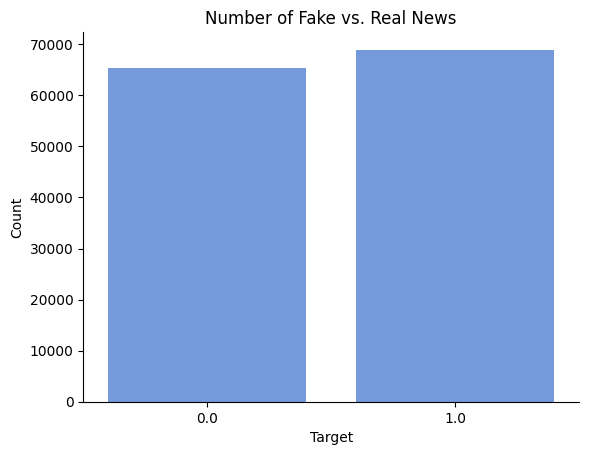

In [80]:
# Count for target variable

plt.figure()
sns.countplot(data=df, x="BinaryNumTarget", color="cornflowerblue")
plt.title("Number of Fake vs. Real News")
plt.xlabel("Target")
plt.ylabel("Count")
sns.despine()
plt.show()

In [81]:
prop_real = round((df["BinaryNumTarget"] == 1).sum()/df.shape[0]*100,2)
prop_fake = round((df["BinaryNumTarget"] == 0).sum()/df.shape[0]*100,2)

print(f"Proportion of Real News: {prop_real}%")
print(f"Proportion of Fake News: {prop_fake}%")

Proportion of Real News: 51.36%
Proportion of Fake News: 48.64%


Findings:
- There is 2.72% more Real News than Fake News.

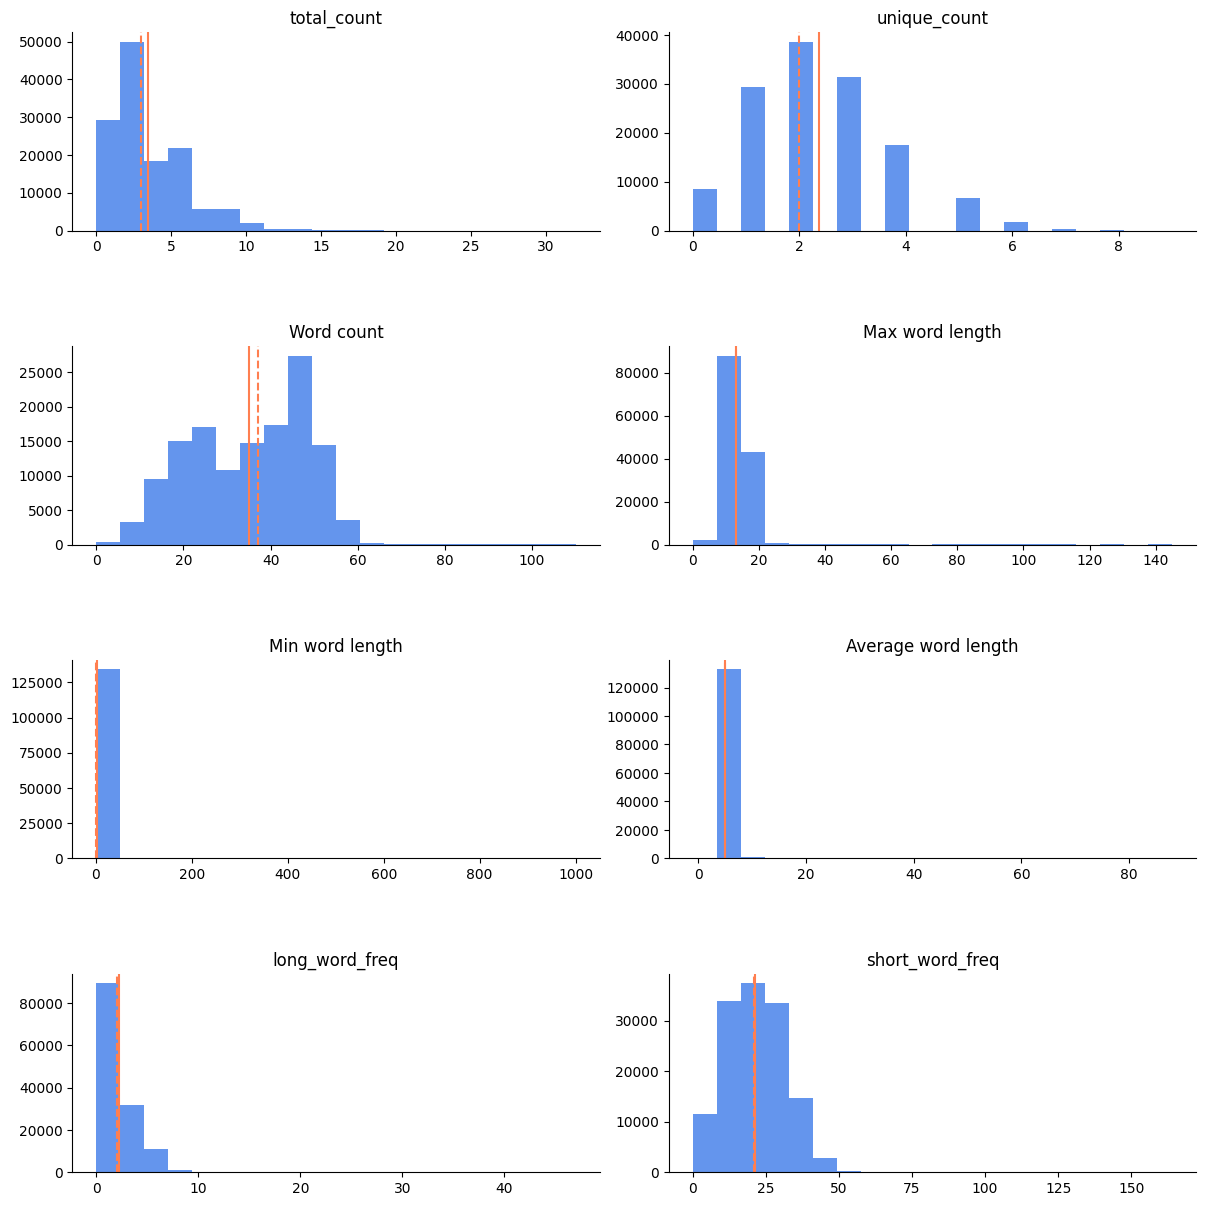

In [82]:
# distribution for features related to twitter posts
post_word_features = df[["total_count", "unique_count", "Word count", "Max word length", "Min word length", "Average word length", "long_word_freq", "short_word_freq"]]

# plot 
plt.subplots(4, 2, figsize=(12, 12))
for i, column in enumerate(post_word_features.columns, 1):
    plt.subplot(4, 2, i)
    plt.hist(post_word_features[column], bins=20, color="cornflowerblue")
    sns.despine()
    plt.title(column)
    plt.axvline(post_word_features[column].mean(), 0, 350000, c="coral", label="mean")
    plt.axvline(post_word_features[column].median(), 0, 350000, c="coral", linestyle="--", label="median")
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [83]:
post_word_features.describe()

,total_count,unique_count,Word count,Max word length,Min word length,Average word length,long_word_freq,short_word_freq
count,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,3.441229,2.365624,35.077691,13.062043,1.399857,5.056648,2.249557,21.438658
std,2.479373,1.351617,13.604442,3.044782,2.795407,0.825737,2.912136,9.625147
min,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,2.000000,1.000000,23.000000,11.000000,1.000000,4.571429,1.000000,14.000000
50%,3.000000,2.000000,37.000000,13.000000,1.000000,4.955556,2.000000,21.000000
75%,5.000000,3.000000,46.000000,15.000000,2.000000,5.409091,3.000000,28.000000
max,32.000000,9.000000,110.000000,145.000000,1000.000000,88.000000,47.000000,164.000000


Findings:
- The distribution of the total count of words in the tweet demonstrate a notably strong right-skewwed distribution. This indicates that most of the total count of words falls between 1 and 5 and that there are some lengthy tweets with over 30 words.
- The `unique_count` variable distribution shows a slight right-skew, but with a count of about 3 unique words per tweet.
- The `Word count` variable is slightly left skewed.
- The distribution of `Max word length` demonstrate a right skew due to at least one word having 145 letters. This may be an error and could decrease accuracy scores later on.
- The distribution of `Min word length` demonstrate a right skew due to at least one word have 1000 letters. This may be an error and could decrease accuracy scores later on.
- The `Average word length` variable shows a right skew due to at least one averge word length being 88.
- The distribution of `long_word_freq` and `short_word_freq` shows a right skew. It is unknown what the threshold for short words and long words are, thus, difficult to draw insights from this data.
- Overall, the variables `Max word length`, `Min word length`, `long_word_freq` and `short_word_freq` demonstrate a non-normal distribution which may become problematic for our analysis later on. There are two approaches to this issue:
    1. Remove rows that are outliers by using np.where function to find rows that exceed a certain value.
    2. Keep the skewed values for now as it may be resolved later on. 
- We will take the second approach. 

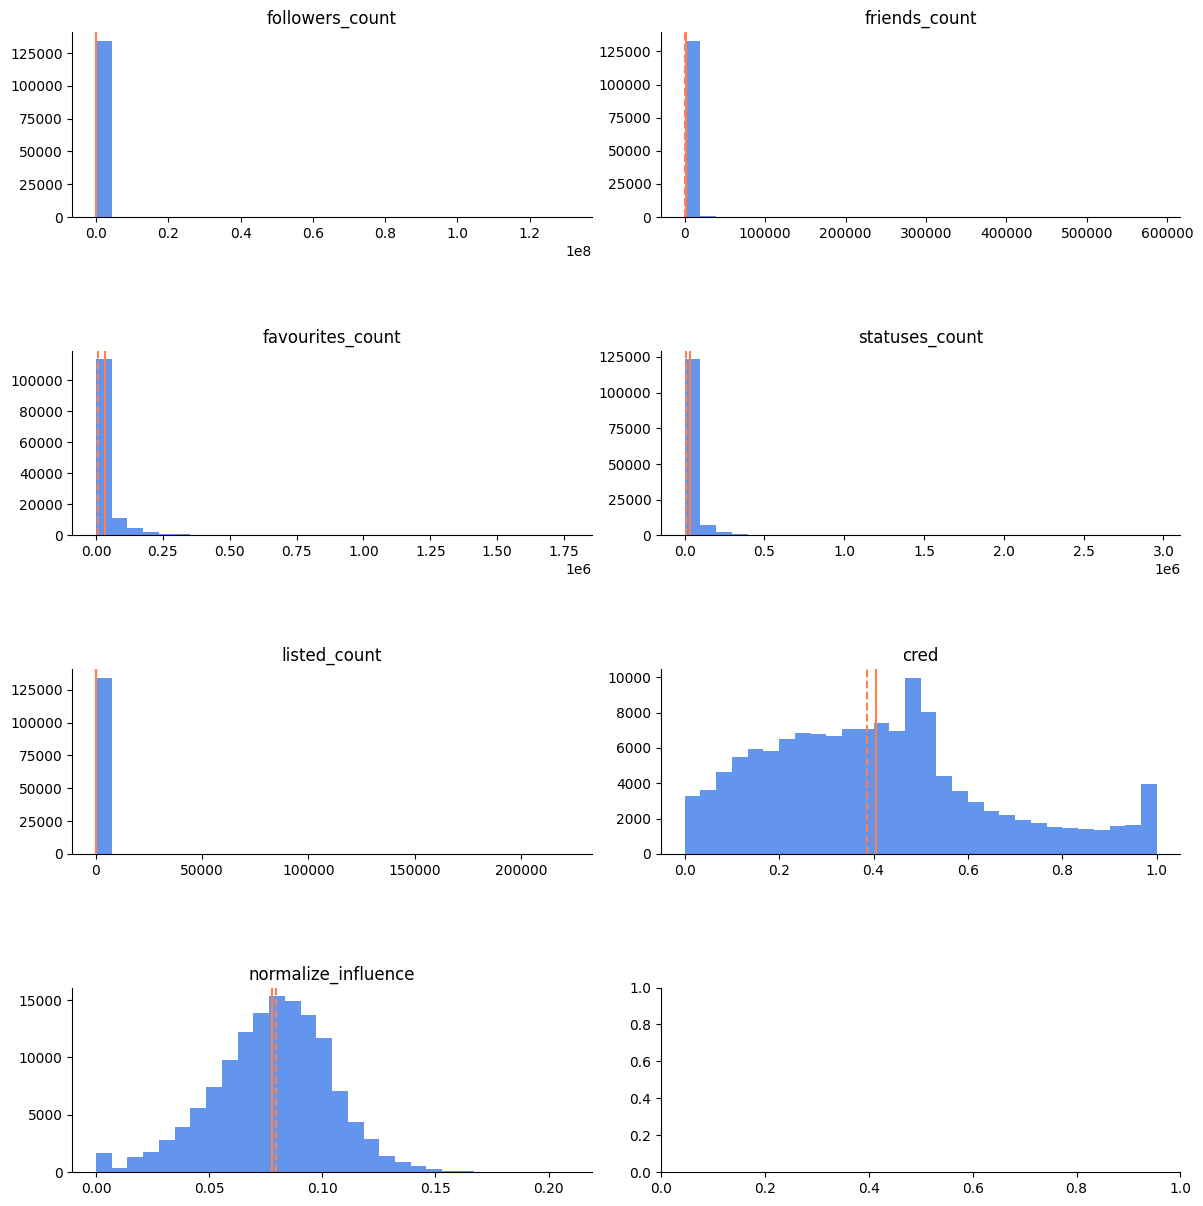

In [84]:
# distribution of twitter user features
user_features = df[["followers_count", "friends_count", "favourites_count", "statuses_count", "listed_count", "cred", "normalize_influence"]] 
                    
# plot 
plt.subplots(4, 2, figsize=(12, 12))
for i, column in enumerate(user_features.columns, 1):
    plt.subplot(4, 2, i)
    plt.hist(user_features[column], bins=30, color="cornflowerblue")
    sns.despine()
    plt.title(column)
    plt.axvline(user_features[column].mean(), 0, 350000, c="coral", label="mean")
    plt.axvline(user_features[column].median(), 0, 350000, c="coral", linestyle="--", label="median")
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [85]:
user_features.describe()

,followers_count,friends_count,favourites_count,statuses_count,listed_count,cred,normalize_influence
count,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.000000,134198.000000
mean,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.405852,0.077665
std,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.239223,0.026184
min,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.223684,0.061814
50%,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.386691,0.079436
75%,1.573000e+03,1726.000000,3.352650e+04,3.357375e+04,11.000000,0.525020,0.095308
max,1.306019e+08,586901.000000,1.765080e+06,2.958918e+06,222193.000000,1.000000,0.208606


Findings:
- The first five graphs demonstrate a strong right skew distribution, again due to outliers in the data. 
- As with the previous findings, we will keep the variables for now. 
- The `cred` variable shows a right skew distribution, however, most of twitter users have a score of 0.4 for credibility.
- The `normalize_influence` variable shows a relatively normal distribution, with a mean of 0.07.

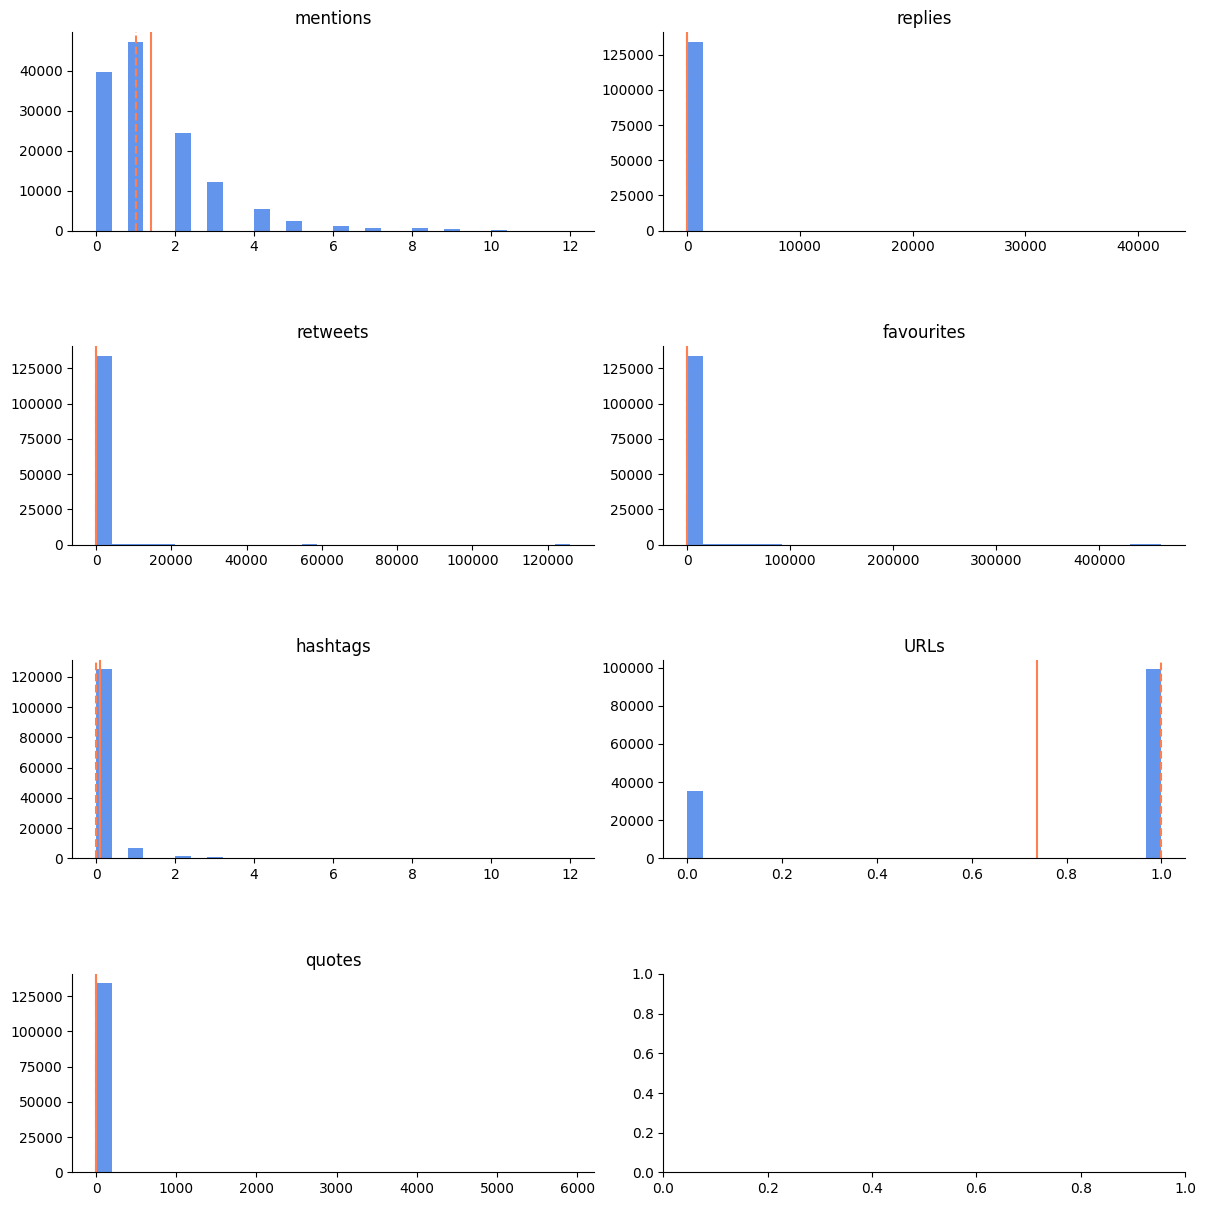

In [86]:
# distribution of user action features
user_action_features = df[["mentions", "replies", "retweets", "favourites", "hashtags", "URLs", "quotes"]]

# plot 
plt.subplots(4, 2, figsize=(12, 12))
for i, column in enumerate(user_action_features.columns, 1):
    plt.subplot(4, 2, i)
    plt.hist(user_action_features[column], bins=30, color="cornflowerblue")
    sns.despine()
    plt.title(column)
    plt.axvline(user_action_features[column].mean(), 0, 350000, c="coral", label="mean")
    plt.axvline(user_action_features[column].median(), 0, 350000, c="coral", linestyle="--", label="median")
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [87]:
user_action_features.describe()

,mentions,replies,retweets,favourites,hashtags,URLs,quotes
count,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,1.388918,1.914201,6.674354,27.572386,0.104726,0.737701,0.573406
std,1.471604,122.041183,406.542579,1831.425703,0.458687,0.439886,28.436726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,12.000000,42068.000000,126062.000000,460320.000000,12.000000,1.000000,5913.000000


Findings:
- All variables except `URLs` demonstrate a right skew distribution. As with the previous distributions, we will keep these variables for now.
- The `URLs` variable shows that more twitter users provided a URL in relation to their profile compared to users that did not. 

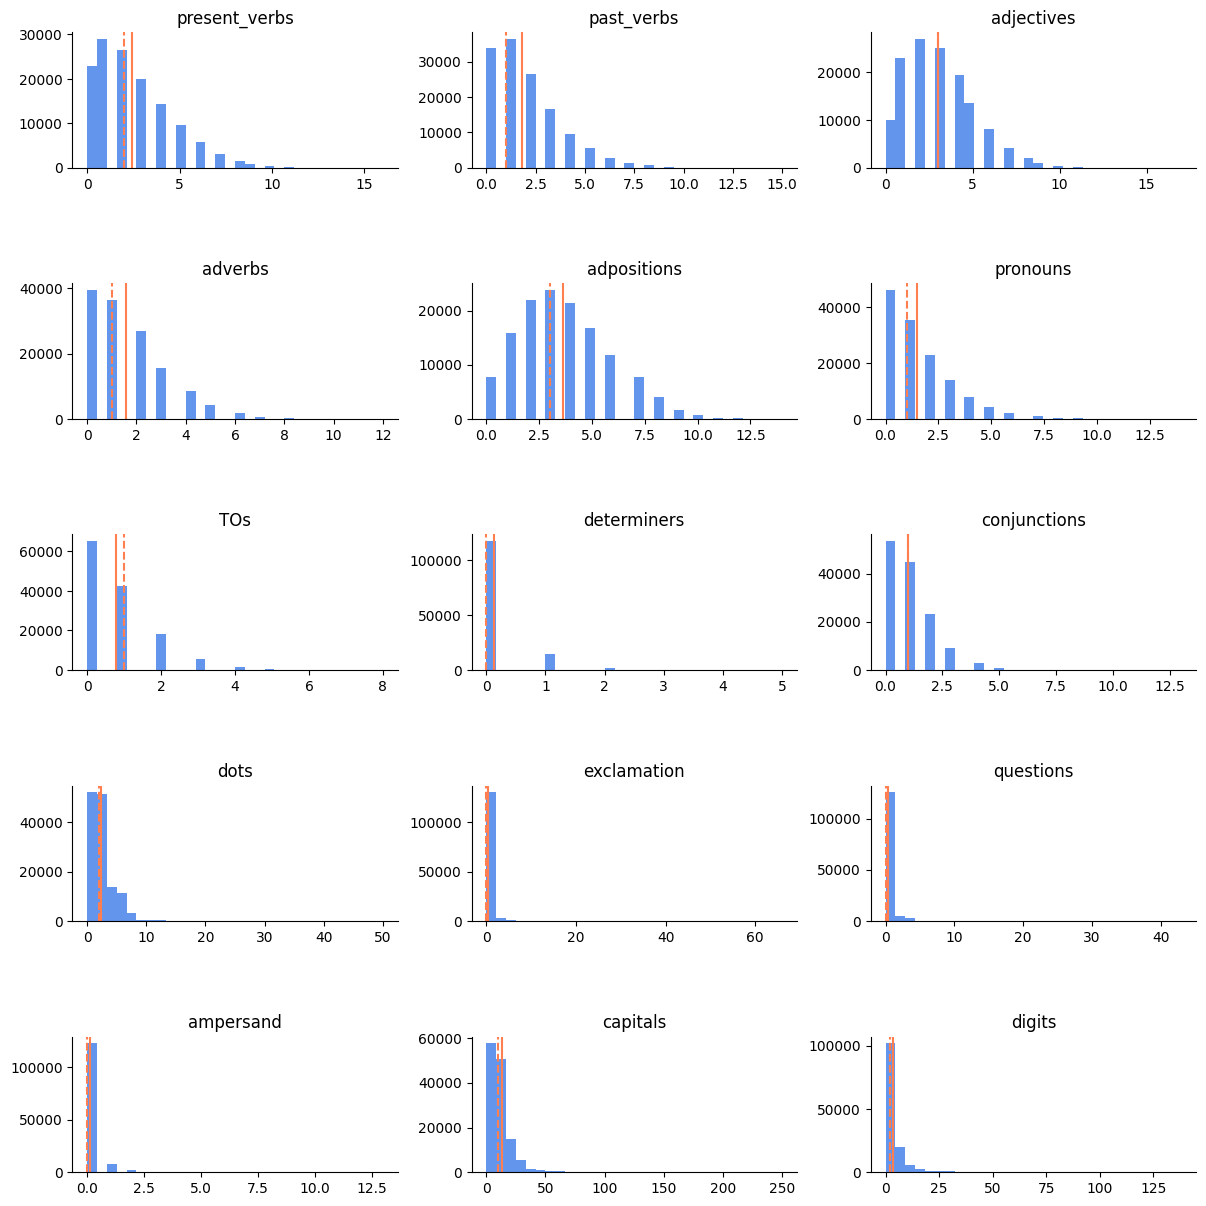

In [88]:
# distribution of syntax features
syntax_features = df[["present_verbs", "past_verbs", "adjectives", "adverbs", "adpositions", "pronouns", "TOs", "determiners", "conjunctions", "dots", "exclamation", "questions", "ampersand", "capitals", "digits"]]

# plot 
plt.subplots(5, 3, figsize=(12, 12))
for i, column in enumerate(syntax_features.columns, 1):
    plt.subplot(5, 3, i)
    plt.hist(syntax_features[column], bins=30, color="cornflowerblue")
    sns.despine()
    plt.title(column)
    plt.axvline(syntax_features[column].mean(), 0, 350000, c="coral", label="mean")
    plt.axvline(syntax_features[column].median(), 0, 350000, c="coral", linestyle="--", label="median")
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [89]:
syntax_features.describe()

,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits
count,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,2.452354,1.81221,3.034308,1.575873,3.619644,1.49582,0.788626,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494
std,2.049247,1.73699,2.012125,1.546382,2.195625,1.63947,0.961242,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,2.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,2.000000,1.00000,3.000000,1.000000,3.000000,1.00000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000
75%,4.000000,3.00000,4.000000,2.000000,5.000000,2.00000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,15.000000,4.000000
max,16.000000,15.00000,17.000000,12.000000,14.000000,14.00000,8.000000,5.000000,13.000000,50.000000,66.000000,43.000000,13.000000,250.000000,138.000000


Findings:
- The first two rows indicates a right skew distribution.
- The last three rows shows a stronger right skew distribution. This indicates that there are some twitter posts with more `dots`, `exclamation`, `questions`, `ampersand`, `capitals`, and `digits` than other tweets. We will keep these variables for now. 

In [90]:
# Explore topic features
# Create numpy array to prepare for plot
x_topic = np.array(["ORG", "NORP", "GPE", "PERSON", "MONEY", "DATE", "CARDINAL", "PERCENT", "ORDINAL", "FAC", "LAW", "PRODUCT", "EVENT", "TIME", "LOC", "WORK_OF_ART", "QUANTITY", "LANGUAGE"])
y_number = np.array([df["ORG_percentage"].sum(),
                     df["NORP_percentage"].sum(),
                     df["GPE_percentage"].sum(),
                     df["PERSON_percentage"].sum(),
                     df["MONEY_percentage"].sum(),
                     df["DATE_percentage"].sum(),
                     df["CARDINAL_percentage"].sum(),
                     df["PERCENT_percentage"].sum(),
                     df["ORDINAL_percentage"].sum(),
                     df["FAC_percentage"].sum(),
                     df["LAW_percentage"].sum(),
                     df["PRODUCT_percentage"].sum(),
                     df["EVENT_percentage"].sum(),
                     df["TIME_percentage"].sum(),
                     df["LOC_percentage"].sum(),
                     df["WORK_OF_ART_percentage"].sum(),
                     df["QUANTITY_percentage"].sum(),
                     df["LANGUAGE_percentage"].sum()])

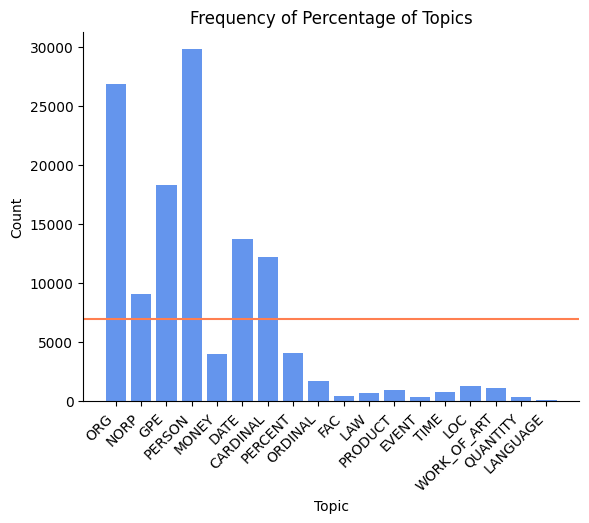

In [91]:
# Plot syntax features
plt.figure()
plt.bar(x_topic, y_number, color="cornflowerblue")
plt.title("Frequency of Percentage of Topics")
plt.xlabel("Topic")
plt.xticks(rotation=45, ha='right') 
plt.ylabel("Count")
plt.axhline(y_number.mean(), 0, 350000, c="coral", label="mean")
sns.despine()
plt.show()

Findings:
- The bar chart shows that there was a greater proportion of tweets about people compared to the other topics.
- The second most common topic was about organizations (and companies, agencies, institutions), followed by GPE which is about countries, cities and states.

<Axes: >

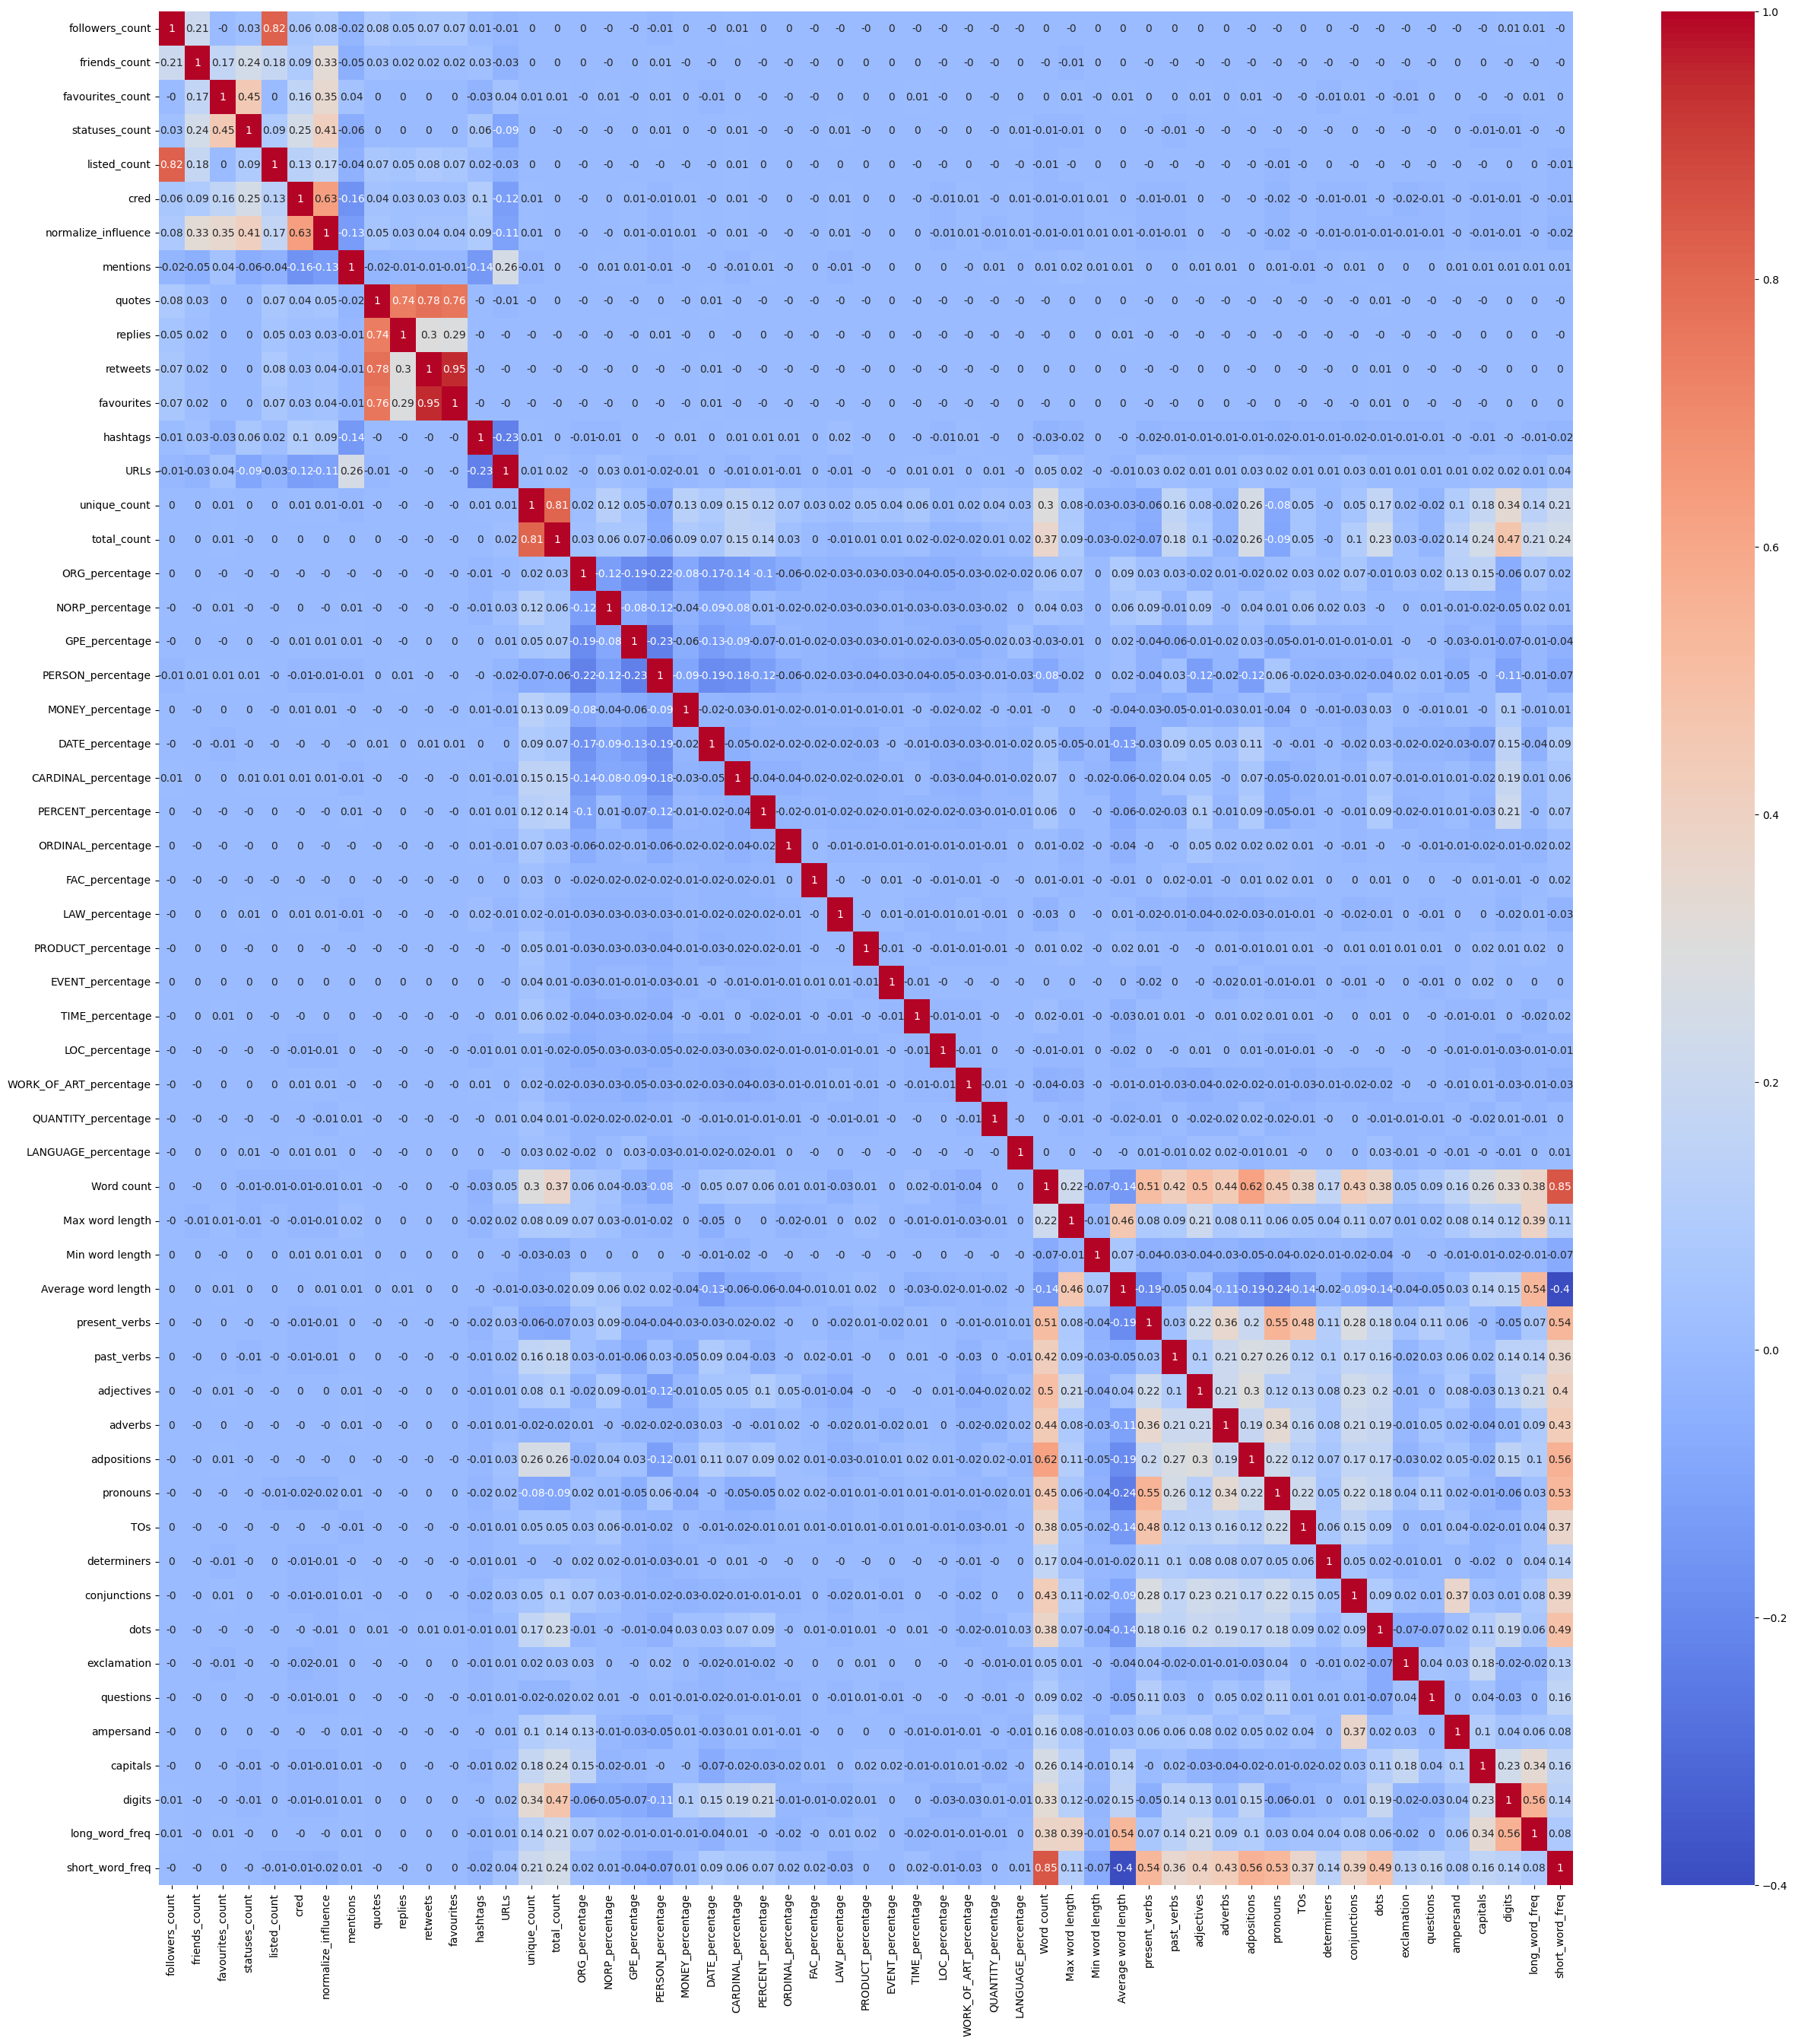

In [92]:
# Display the heatmap for correlation matrix:
X_corr = df.drop(columns = ["tweet", "statement", "majority_target", "embeddings", "BinaryNumTarget"])
plt.figure(figsize= (30, 32))
sns.heatmap(round(X_corr.corr(),2), cmap='coolwarm', annot=True)

The correlation matrix demonstrates that some columns are highly related to eachother. For example, the word count and short_word_frequency is highly correlated.
While the matrix shows us some relationship between variables, it does not indicate multicollinearity. For that, we will do a Variance Inflation Factor to identify which variables have a correlation with multiple independent variables. 

### Preprocessing Data
#### Check Assumption - Multicollinearity
##### Variance Inflation Factor (VIF)

In [93]:
# to check VIF drop columns that are not numeric
X_nums = df.drop(columns = ["tweet", "statement", "majority_target", "embeddings", "BinaryNumTarget"])
y = df["BinaryNumTarget"]

In [94]:
# import packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_nums_withc = sm.add_constant(X_nums)

# create series of variable and its vif in descending order
pd.Series(
    [variance_inflation_factor(X_nums_withc, i) for i in range(X_nums_withc.shape[1])],
    index=X_nums_withc.columns
).sort_values(ascending=False)

const                     131.797300
Word count                12.634899 
retweets                  12.453598 
favourites                9.830130  
quotes                    9.398141  
short_word_freq           8.856270  
replies                   3.986139  
total_count               3.948642  
unique_count              3.547114  
listed_count              3.116581  
followers_count           3.090605  
long_word_freq            3.067785  
Average word length       2.684624  
PERSON_percentage         2.431481  
present_verbs             2.392101  
digits                    2.318371  
adpositions               2.304845  
ORG_percentage            2.275625  
normalize_influence       2.166418  
GPE_percentage            2.038556  
pronouns                  1.893259  
DATE_percentage           1.819861  
CARDINAL_percentage       1.745667  
cred                      1.726330  
dots                      1.664244  
adjectives                1.656773  
capitals                  1.574451  
N

Findings:
- VIF values greater than 5 indicate that the variable is correlated with another variable. Thus, we must remove one of the two columns.
- Recall the above correlation matrix:
    - `Word count` has the greatest VIF value and has a high positive correlation with `short_word_freq`, thus we will drop `Word count`
    - The variables `retweets`,`favourites` and `quotes` all have a high positive correlation with eachother. We will drop the `favourites` variable because this has the highest correlation with the rest.
    
- From here, we will do a backwards selection to remove cells we don't want when modelling.

In [95]:
# drop columns with high VIF
X_nums_withc = X_nums_withc.drop(columns = ["Word count", "favourites"])

In [96]:
# run a logisitc regression to check which columns are good predictors for the logisitic regression

mylogreg = sm.Logit(y, X_nums_withc)
mylogreg_results = mylogreg.fit()

mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.637183
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        BinaryNumTarget   No. Observations:               134198
Model:                          Logit   Df Residuals:                   134144
Method:                           MLE   Df Model:                           53
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.08025
Time:                        22:43:37   Log-Likelihood:                -85509.
converged:                       True   LL-Null:                       -92969.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7430      0.074     -9.982      0.000      -0.889      -0.597
followers_count        -3.293e-08   5.31e-08     -0.620      0.535   -1.37e-07    7.11e-08
friends_count          -4.487e-06   9.55e-07     -4.698      0.000   -6.36e-06   -2.62e-06
favourites_count         2.69e-07   1.01e-07      2.660      0.008    7.08e-08    4.67e-07
statuses_count          6.648e-07   1.02e-07      6.488      0.000    4.64e-07    8.66e-07
listed_count               0.0002   2.23e-05      7.394      0.000       0.000       0.000
cred                       0.2600      0.032      8.172      0.000       0.198       0.322
normalize_influence        6.4822      0.331     19.611      0.000       5.834       7.130
mentions                   0.0072      0.004      1.767      0.077      -0.001       0.015
quotes                    -0.0044      0.002     -2.847      0.004      -0.007      -0.001
replies                   -0.0021      0.001     -3.619      0.000      -0.003      -0.001
retweets                   0.0002   6.41e-05      3.855      0.000       0.000       0.000
hashtags                   0.3913      0.016     23.735      0.000       0.359       0.424
URLs                      -0.5136      0.014    -36.301      0.000      -0.541      -0.486
unique_count               0.0962      0.008     11.914      0.000       0.080       0.112
total_count               -0.0008      0.005     -0.170      0.865      -0.010       0.008
ORG_percentage             0.0245      0.031      0.783      0.434      -0.037       0.086
NORP_percentage            0.7289      0.044     16.663      0.000       0.643       0.815
GPE_percentage             0.3534      0.034     10.483      0.000       0.287       0.419
PERSON_percentage         -0.4003      0.030    -13.244      0.000      -0.460      -0.341
MONEY_percentage           1.5444      0.064     24.005      0.000       1.418       1.671
DATE_percentage            0.3629      0.037      9.713      0.000       0.290       0.436
CARDINAL_percentage        0.8874      0.040     21.932      0.000       0.808       0.967
PERCENT_percentage         0.5470      0.058      9.463      0.000       0.434       0.660
ORDINAL_percentage         0.1667      0.086      1.941      0.052      -0.002       0.335
FAC_percentage            -0.9820      0.166     -5.908      0.000      -1.308      -0.656
LAW_percentage             1.3902      0.131     10.628      0.000       1.134       1.647
PRODUCT_percentage        -0.0297      0.110     -0.269      0.788      -0.246       0.187
EVENT_percentage           1.4757      0.194      7.599      0.000       1.095       1.856
TIME_percentage           -0.8759      0.130     -6.731      0.000      -1.131      -0.621
LOC_percentage             0.3903      0.085      4.608      0.000       0.224       0.556
WORK_OF_ART_percentage    -0.5969      0.098     -6.122      0.000      -0.788      -0.406
QUANTITY_percentage       -0.5993      0.191     -3.139 

In [97]:
predicted_proba = mylogreg_results.predict(X_nums_withc)
predicted_proba

# turning the probabilities into 1/0 predictions by cutting off at a threshold
predictions = np.where(predicted_proba >= 0.5, 1, 0)

# accuracy - at what rate our predictions equal the true value
(predictions == y).mean()

0.6360825049553644

Findings:
- The results shows that variables with p values greater than 0.05 are:
    - `followers_count`, `mentions`, `total_count`, `ORG_percentage`, `PRODUCT_percentage`, `adverbs`, and `dots`
- Recall that during the EDA, `followers_count`, `mentions`, `total_count`, and `ampersand` had a strong right skew in the distribution. 
- We will remove these columns to see if it brings up our accuracy score.

In [98]:
# drop columns that are not good predictors
X_nums_withc2 = X_nums_withc.drop(columns = ["followers_count", "mentions", "total_count", "adverbs", "dots"])

In [99]:
# run a logisitc regression to check which columns are good predictors for the logisitic regression

mylogreg = sm.Logit(y, X_nums_withc2)
mylogreg_results = mylogreg.fit()

mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.637206
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        BinaryNumTarget   No. Observations:               134198
Model:                          Logit   Df Residuals:                   134149
Method:                           MLE   Df Model:                           48
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.08021
Time:                        22:43:38   Log-Likelihood:                -85512.
converged:                       True   LL-Null:                       -92969.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7180      0.074     -9.766      0.000      -0.862      -0.574
friends_count          -4.516e-06   9.55e-07     -4.730      0.000   -6.39e-06   -2.64e-06
favourites_count        2.806e-07   1.01e-07      2.782      0.005     8.3e-08    4.78e-07
statuses_count          6.624e-07   1.02e-07      6.470      0.000    4.62e-07    8.63e-07
listed_count               0.0002   1.99e-05      7.923      0.000       0.000       0.000
cred                       0.2563      0.032      8.081      0.000       0.194       0.318
normalize_influence        6.4677      0.330     19.584      0.000       5.820       7.115
quotes                    -0.0047      0.002     -3.100      0.002      -0.008      -0.002
replies                   -0.0022      0.001     -3.798      0.000      -0.003      -0.001
retweets                   0.0003   6.09e-05      4.258      0.000       0.000       0.000
hashtags                   0.3891      0.016     23.686      0.000       0.357       0.421
URLs                      -0.5082      0.014    -36.772      0.000      -0.535      -0.481
unique_count               0.0951      0.006     16.978      0.000       0.084       0.106
ORG_percentage             0.0245      0.031      0.781      0.435      -0.037       0.086
NORP_percentage            0.7295      0.044     16.683      0.000       0.644       0.815
GPE_percentage             0.3522      0.034     10.471      0.000       0.286       0.418
PERSON_percentage         -0.4008      0.030    -13.265      0.000      -0.460      -0.342
MONEY_percentage           1.5453      0.064     24.061      0.000       1.419       1.671
DATE_percentage            0.3650      0.037      9.791      0.000       0.292       0.438
CARDINAL_percentage        0.8872      0.040     21.932      0.000       0.808       0.966
PERCENT_percentage         0.5467      0.058      9.460      0.000       0.433       0.660
ORDINAL_percentage         0.1682      0.086      1.960      0.050   -1.78e-05       0.336
FAC_percentage            -0.9782      0.166     -5.892      0.000      -1.304      -0.653
LAW_percentage             1.3912      0.131     10.641      0.000       1.135       1.647
PRODUCT_percentage        -0.0301      0.110     -0.273      0.785      -0.246       0.186
EVENT_percentage           1.4811      0.194      7.630      0.000       1.101       1.862
TIME_percentage           -0.8742      0.130     -6.726      0.000      -1.129      -0.619
LOC_percentage             0.3894      0.085      4.601      0.000       0.224       0.555
WORK_OF_ART_percentage    -0.5957      0.097     -6.116      0.000      -0.787      -0.405
QUANTITY_percentage       -0.5902      0.191     -3.094      0.002      -0.964      -0.216
LANGUAGE_percentage        5.7992      0.536     10.811      0.000       4.748       6.851
Max word length           -0.0189      0.002     -7.885      0.000      -0.024      -0.014
Min word length            0.0715      0.012      6.074 

In [100]:
predicted_proba = mylogreg_results.predict(X_nums_withc2)
predicted_proba

# turning the probabilities into 1/0 predictions by cutting off at a threshold
predictions = np.where(predicted_proba >= 0.5, 1, 0)

# accuracy - at what rate our predictions equal the true value
(predictions == y).mean()

0.6362464418247664

In [101]:
print(0.6360825049553644-0.6362464418247664)

-0.0001639368694019705


Findings:
- Removing the columns decreased the accuracy score by -0.0001639368694019705
- This is not a good strategy for dealing with multicollinearity.
    - Later on we will also consider Principle Component Analysis (PCA) to deal with remove multicollinearity.
    - We will consider removing the outliers from variables with strong skews in the distribution. Perhaps this will increase the accuracy of models. However, for now we will keep the variables as they are. 

### Feature Engineering 

So far, we've removed `Word count` and `followers`. We're now going to add features to our dataset. These features will be the sentiment score of the tweets.

#### VADER Sentiment 
We will be using the SentimentIntensityAnalyzer funciton from the vaderSentiment package. VADER stands for Valence Aware Dictionary and sEntiment Reasoner. It is a rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It will detect the polarity of sentiment (how positive, neutral, or negative) the given text is. 

In [102]:
# import package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [103]:
tweets = df["tweet"]

In [104]:
tweets = pd.DataFrame(tweets)
tweets.head()

,tweet
0,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?"
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda."
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!
3,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)"
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF."


In [105]:
# remove new line indicator 
tweets.replace("\n", "", regex=True, inplace=True)

In [106]:
# view the first 5 tweets
pd.set_option('display.max_colwidth', 1)
tweets.head()

,tweet
0,"@POTUS Biden Blunders - 6 Month UpdateInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?"
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?Meanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.Fuck off with this corporatist propaganda."
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!
3,"@POTUS Biden BlundersBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)"
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF."


In [107]:
# Instantiate SentimentIntensityAnalyzer 
obj = SentimentIntensityAnalyzer()

# The sentiment analysis takes in lists so we will turn our dataframe into a list
tweets_list = tweets["tweet"].to_list()

In [108]:
# get the polarity score from each tweet in the list, output a list of scores
scores_list = []
for tweet in tweets_list:
    score = obj.polarity_scores(tweet)
    scores_list.append(score)
# create a dataframe with the tweets
tweet_post = pd.DataFrame(tweets_list, columns= ['tweet'])
# create a dataframe with scores
scores_df = pd.DataFrame(scores_list)

In [109]:
# merge these two dataframes together
tweet_score_df= pd.concat([tweet_post,scores_df], axis=1)
tweet_score_df

,tweet,neg,neu,pos,compound
0,"@POTUS Biden Blunders - 6 Month UpdateInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",0.303,0.646,0.051,-0.9169
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?Meanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.Fuck off with this corporatist propaganda.",0.228,0.772,0.000,-0.8807
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,0.292,0.457,0.252,-0.3147
3,"@POTUS Biden BlundersBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",0.231,0.612,0.157,-0.6828
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",0.235,0.708,0.057,-0.8316
...,...,...,...,...,...
134193,"Joe Biden's family owned African slaves....Joe Biden's great-grandfather, Joseph J. Biden (1828-1880) was a slave owner and fought for the Confederate States of America....",0.091,0.909,0.000,-0.3182
134194,"Joe Bidens great, great grandfather was a slave owner.His family owned 12 slaves.",0.000,0.573,0.427,0.8481
134195,"@ChevyChaseToGo ""Joe Bidens great-grandfather Joseph J. Biden (1828-1880) was a slave-owner and fought for the Confederate States of America",0.113,0.887,0.000,-0.3182
134196,@JoeBiden Facts are Bidens VP Kamala Harris Great Great Grandfather was Hamilton Brown a Prominent Successful Slave Plantation Owner and Slave Driver in Jamaica. So Proud Biden chose a VP that comes from a Slave Driving Family as an example of US American History.,0.000,0.681,0.319,0.9601


In [110]:
# concat tweets, sentiment scores and all other numerical features
X_numeric = X_nums_withc.drop(columns = ["const"])
new_df = pd.concat([tweet_score_df, X_numeric], axis=1)
new_df.head()

,tweet,neg,neu,pos,compound,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,"@POTUS Biden Blunders - 6 Month UpdateInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",0.303,0.646,0.051,-0.9169,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?Meanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.Fuck off with this corporatist propaganda.",0.228,0.772,0.000,-0.8807,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,0.292,0.457,0.252,-0.3147,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,"@POTUS Biden BlundersBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",0.231,0.612,0.157,-0.6828,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",0.235,0.708,0.057,-0.8316,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19


In [111]:
# check the shape
print(f"With the new features, we have {new_df.shape[0]} and {new_df.shape[1]} rows.")

With the new features, we have 134198 and 58 rows.


#### Check Assumption - Again

After having added the features we are going to see if they are correlated with each other by looking for the Variance Inflation Factor. 

In [112]:
check_df = new_df.drop(columns = ["tweet"])

# add constant
check_df_withc = sm.add_constant(check_df)

# create series of variable and its vif in descending order
pd.Series(
    [variance_inflation_factor(check_df_withc, i) for i in range(check_df_withc.shape[1])],
    index=check_df_withc.columns
).sort_values(ascending=False)

const                     8.119271e+06
neu                       1.130189e+05
neg                       8.483332e+04
pos                       5.654236e+04
quotes                    9.327264e+00
short_word_freq           6.099587e+00
compound                  5.764103e+00
retweets                  4.653509e+00
replies                   3.975182e+00
total_count               3.758787e+00
unique_count              3.544469e+00
listed_count              3.115994e+00
followers_count           3.089548e+00
long_word_freq            2.738762e+00
Average word length       2.668821e+00
PERSON_percentage         2.431359e+00
digits                    2.291052e+00
ORG_percentage            2.276253e+00
present_verbs             2.266809e+00
normalize_influence       2.168109e+00
GPE_percentage            2.038885e+00
pronouns                  1.887041e+00
DATE_percentage           1.814081e+00
adpositions               1.800630e+00
CARDINAL_percentage       1.745684e+00
cred                     

It's pretty clear that the new features `neu` for neutral sentiment score, `pos` for positive sentiment score and `neg` for negative sentiment score are related to each other. We will drop these columns and keep `compound` which is the overall sentiment score. 

In [113]:
check_df2 = check_df.drop(columns = ["neu", "pos", "neg"])

# add constant
check_df_withc2 = sm.add_constant(check_df2)

# create series of variable and its vif in descending order
pd.Series(
    [variance_inflation_factor(check_df_withc2, i) for i in range(check_df_withc2.shape[1])],
    index=check_df_withc2.columns
).sort_values(ascending=False)

const                     131.645306
quotes                    9.327130  
short_word_freq           6.099394  
retweets                  4.653452  
replies                   3.975159  
total_count               3.758473  
unique_count              3.544182  
listed_count              3.115788  
followers_count           3.089426  
long_word_freq            2.738688  
Average word length       2.668687  
PERSON_percentage         2.431218  
digits                    2.290998  
ORG_percentage            2.275823  
present_verbs             2.266764  
normalize_influence       2.166621  
GPE_percentage            2.038163  
pronouns                  1.887022  
DATE_percentage           1.813375  
adpositions               1.800527  
CARDINAL_percentage       1.745662  
cred                      1.726636  
dots                      1.648248  
NORP_percentage           1.569853  
Max word length           1.505911  
conjunctions              1.466967  
capitals                  1.420648  
T

There are still VIF values above 5 but we will keep these for now. We will deal with it once we perform PCA. 

But notice **compound** has the lowest VIF value. It has the least correlation with the other multiple independent variables. 

### Baseline Modeling
We are now ready for baseline modeling. We will see which classifier has the highest accuracy in order to decide which classifier to proceed with in this project.

#### Logistic Regression

In [114]:
from sklearn.model_selection import train_test_split

# split the data to have 25% test set
X_train, X_test, y_train, y_test = train_test_split(check_df2, y, test_size=0.25, stratify=y, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression

# instantiate logisitic regression 
mylogreg = LogisticRegression(max_iter=1000)
# fit to train data
mylogreg_results = mylogreg.fit(X_train, y_train)
mylogreg_results

LogisticRegression(max_iter=1000)

In [116]:
# Training and test score
print(f"Train score: {mylogreg.score(X_train, y_train)}")
print(f"Test score: {mylogreg.score(X_test, y_test)}")

Train score: 0.5472935378745728
Test score: 0.5465275707898659


The logisitc regression model gave us low accuracy scores for both train and test data set. 
Let's try a decision tree classifier next.

#### Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

# instantiate decision tree classifier
my_dt = DecisionTreeClassifier(max_depth = 4) #choose a random max_depth

#fit to train data
my_dt.fit(X_train, y_train)
    
 # Evaluate on train & test data
print(f" Train score: {my_dt.score(X_train, y_train)}")
print(f" Test score: {my_dt.score(X_test, y_test)}")

 Train score: 0.6071357602734282
 Test score: 0.6050968703427719


The accuracy score from the decision tree model gave us a higher accuracy score. Next we will try the K-Nearest Neighbors Classifier. 

#### K-Nearest Neighbour Classifier (KNN)

In [118]:
# we need to scale the data to run KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

train_accs_s = []
test_accs_s = []
k_values = [2, 6, 10, 14]

# Loop over different number of neighbors
for k in k_values:
    
    # Instantiate & fit
    my_knn = KNeighborsClassifier(n_neighbors = k)
    my_knn.fit(X_train_scaled, y_train)
    # Evaluate on train & test data
    train_accs_s.append( my_knn.score(X_train_scaled, y_train) )
    test_accs_s.append( my_knn.score(X_test_scaled, y_test) )

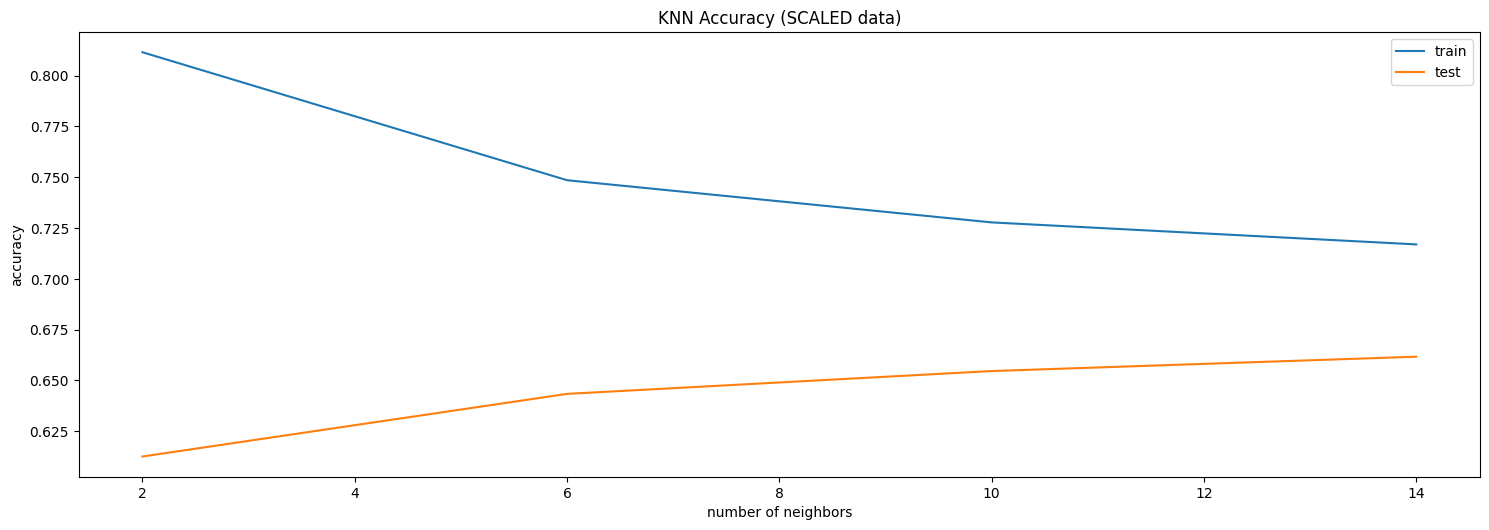

In [123]:
plt.figure(figsize=(15, 10))
    
plt.subplot(212) # plot scaled classifier results
plt.plot(k_values, train_accs_s, label='train')
plt.plot(k_values, test_accs_s, label='test')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('KNN Accuracy (SCALED data)')

plt.tight_layout()
plt.show()

In [124]:
# Instantiate & fit
my_knn = KNeighborsClassifier(n_neighbors = 6)
my_knn.fit(X_train_scaled, y_train)
# Evaluate on train & test data
print(f" Train score: {my_knn.score(X_train_scaled, y_train)}" )
print(f" Test score: {my_knn.score(X_test_scaled, y_test)}" )

 Train score: 0.7485195930371195
 Test score: 0.6433681073025336


Based on the iterative process of finding the best number of neighbours, we decided with 6. However the train and test score shows that there is overfitting. While these results are not great, we could improve this through hyperparamter tuning and cross validations.

Lastly, we will look at Naive Bayes classification.

#### Naive Bayes Classification

In [127]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import warnings
warnings.filterwarnings('ignore')

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_train,y_train)

# Evaluate on train & test data
print(f" Train score: {nbmodel.score(X_train_scaled, y_train)}" )
print(f" Test score: {nbmodel.score(X_test_scaled, y_test)}" )

 Train score: 0.5925403386058342
 Test score: 0.5902831594634873


The Naive Bayes classifier gave us the lowest accuracy scores compared to the rest of the classification models.

## Conclusion

- Overall, during the variable selection process of sprint 2, we ran into problems of skewed data (due to robust outliers) and high VIF values indicating multicollinearity. In the next steps, it may be worth removing the outliers in order to work with more normally distributed variables.
- As well, our findings indicate that the Decision Tree Classifier exhibits the highest train and test accuracy scores. While the KNN has a high train score, the test score is much lower which indicates overfitting.
- Taking these baseline models into account, the next steps would be to do hyperparameter optimization by scaling the data to pass through a Principle Component Analysis. We will then run a grid search in order to do a cross validations. Nonetheless, the next steps would involve improving the classification models.